# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [62]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
# browser = Browser('chrome')
# create browser
from selenium.webdriver.chrome.service import Service
my_service = Service(executable_path='d:/chromedriver.exe')
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [64]:
# Visit the website 
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

#go to url
browser.visit(url)

#parse html
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [65]:
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')

In [66]:
# Extract all rows of data
main_page = soup.find("div", class_ = "py-4")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [67]:
# Create an empty list for final results
table_data = []

# list for header elements
header = []

# go to ideal path to extract data needed
rows1 = main_page.find("table", class_ = "table")

# path to get header elements
header_info = rows1.find_all("th")

# loop to get each element from the row header
for th in header_info:
    
    # append to a new list to then add to the dataframe
    header.append(th.text)

# go to each row for the information
rows = rows1.find_all("tr", class_= "data-row")

# Loop through the scraped data to create a list of rows
for td in rows:
    information = []

    # nested loop to get all objects from each row
    for data in td.find_all('td'):
        
        # append information from single class data-row
        information.append(data.text)
    
    # append all the rows in the table together
    table_data.append(information)

In [68]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(table_data, columns = header)

In [69]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [70]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [71]:
# Change data types for data analysis
mars_df = mars_df.astype({"id": "int", 
                          "terrestrial_date": "datetime64", 
                          "sol": "int",
                          "ls": "int",
                          "month": "int",
                          "min_temp": "float",
                          "pressure": "float"})


In [72]:
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [73]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [74]:
# 1. How many months are there on Mars?
months = mars_df.month.nunique()

print(f"There are {months} months in Mars.")

There are 12 months in Mars.


In [75]:
# 2. How many Martian days' worth of data are there?
days_data = mars_df.terrestrial_date.count()

print(f"There are {days_data} days worth of data.")

There are 1867 days worth of data.


In [76]:
# 3. What is the average low temperature by month?
min_temp_avg = mars_df.groupby("month")["min_temp"].mean()

print(f"Average low temperature by {min_temp_avg}.")

Average low temperature by month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64.


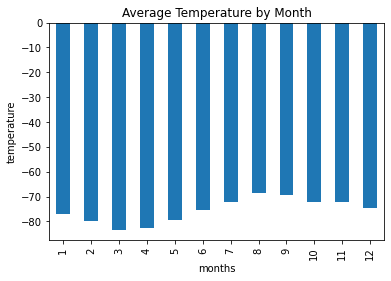

In [77]:
# Plot the average temperature by month
min_temp_avg.plot(kind = 'bar', width = 0.5)
plt.xlabel("months")
plt.ylabel("temperature")
plt.title("Average Temperature by Month")

# display bar chart & save
plt.savefig("images/avg_temp_by_month.png")
plt.show()

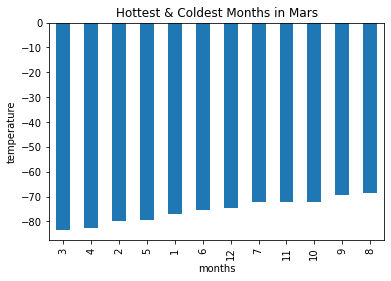

In [78]:
# Identify the coldest and hottest months in Curiosity's location
temp_sorted = min_temp_avg.sort_values()

# plot the bar chart
temp_sorted.plot(kind = 'bar', width =0.5)
plt.xlabel("months")
plt.ylabel("temperature")
plt.title("Hottest & Coldest Months in Mars")

# display bar chart & save
plt.savefig("images/hottest_coldest_months.png")
plt.show()

### Curiosity's location as of 3/12/2023 at 5:14pm CST is SOL 3749 in Gediz Vallis and Near Aeolis Mons (Mount Sharp)

In [79]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby("month")["pressure"].mean()

print(f"Average pressure by Martian {round(avg_pressure,2)}")

Average pressure by Martian month
1     862.49
2     889.46
3     877.32
4     806.33
5     748.56
6     745.05
7     795.11
8     873.83
9     913.31
10    887.31
11    857.01
12    842.16
Name: pressure, dtype: float64


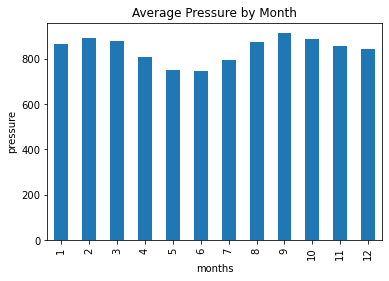

In [80]:
# Plot the average pressure by month
avg_pressure.plot(kind = 'bar', width = 0.5)
plt.xlabel("months")
plt.ylabel("pressure")
plt.title("Average Pressure by Month")

# display bar chart & save
plt.savefig("images/avg_prss_by_month.png")
plt.show()

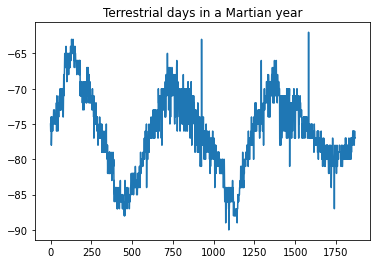

In [81]:
# 5. How many terrestrial (earth) days are there in a Martian year?
days = mars_df["min_temp"]

# plot the daily minimum temperature
days.plot()
plt.title("Terrestrial days in a Martian year")

# display chart & save
plt.savefig("images/earth_days_to_martian_year.png")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [82]:
# Write the data to a CSV
mars_df.to_csv("mars_weather.csv")

In [83]:
browser.quit()